In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
linkage_matrix = sch.linkage(X_scaled, method='ward')

Text(0.5, 1.0, 'Dendrogram for Hierarchical Clustering of Iris Dataset')

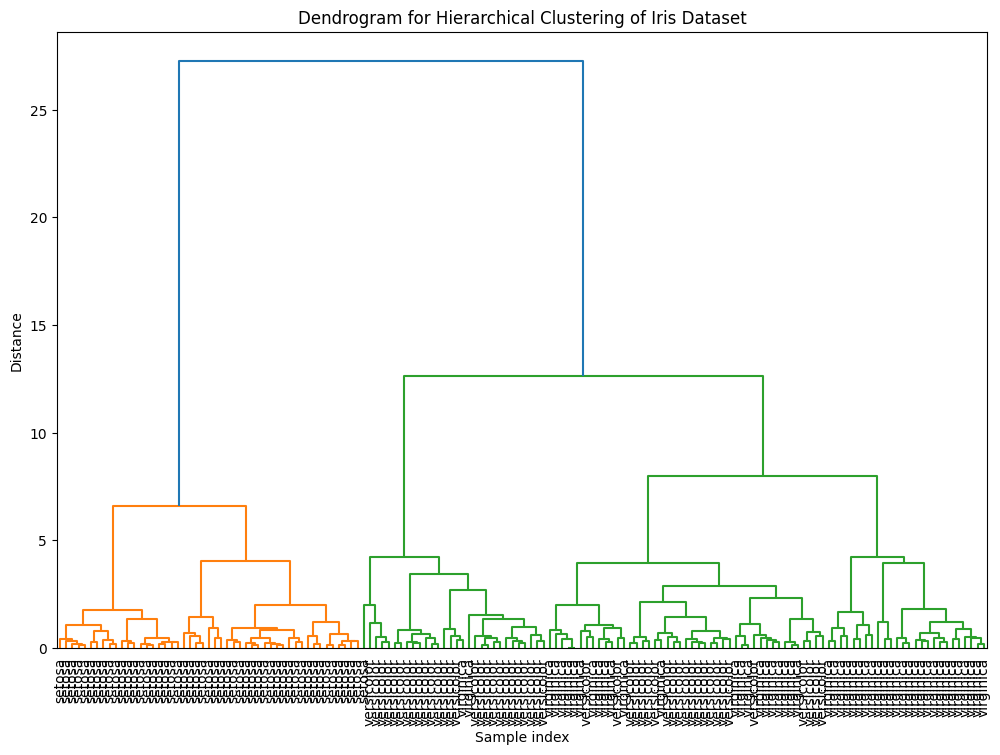

In [5]:
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix,
               labels=iris.target_names[y],
               leaf_rotation=90,
               leaf_font_size=10,
               color_threshold=0.7 * max(linkage_matrix[:, 2]))  # Adjust color threshold for better visualization
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering of Iris Dataset')

In [6]:
n_clusters = 3

In [7]:
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_agg = agg_clustering.fit_predict(X_scaled)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Hierarchical Clustering of Iris Dataset in PCA-reduced Space')

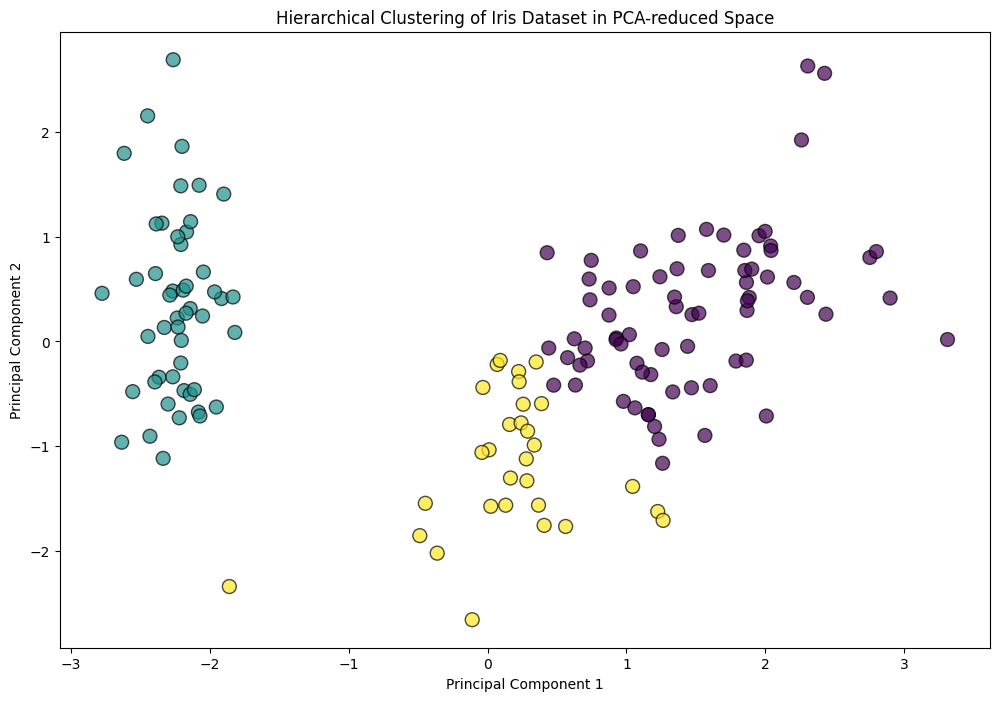

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering of Iris Dataset in PCA-reduced Space')